In [1]:
# ------------------------------------------------------------
# Hierarchical Clustering (Single Linkage, Pure Python)
# ------------------------------------------------------------

# Data points
X = [[1,2],[2,3],[3,4],[8,7],[9,8]]

# Initially each point is its own cluster
clusters = [[x] for x in X]

# Function to calculate distance between two points
def distance(a, b):
    return ((a[0]-b[0])**2 + (a[1]-b[1])**2)**0.5

# Function for single linkage (min distance)
def cluster_distance(c1, c2):
    min_d = 9999
    for p1 in c1:
        for p2 in c2:
            d = distance(p1, p2)
            if d < min_d:
                min_d = d
    return min_d

# Step: Merge clusters until one remains
while len(clusters) > 1:
    min_dist = 9999
    pair = (0, 1)
    for i in range(len(clusters)):
        for j in range(i+1, len(clusters)):
            d = cluster_distance(clusters[i], clusters[j])
            if d < min_dist:
                min_dist = d
                pair = (i, j)
    # Merge the two closest clusters
    c1, c2 = clusters[pair[0]], clusters[pair[1]]
    new_cluster = c1 + c2
    clusters.pop(pair[1])
    clusters.pop(pair[0])
    clusters.append(new_cluster)
    print("Merged:", new_cluster)

print("Final Cluster:", clusters)

Merged: [[1, 2], [2, 3]]
Merged: [[3, 4], [1, 2], [2, 3]]
Merged: [[8, 7], [9, 8]]
Merged: [[3, 4], [1, 2], [2, 3], [8, 7], [9, 8]]
Final Cluster: [[[3, 4], [1, 2], [2, 3], [8, 7], [9, 8]]]


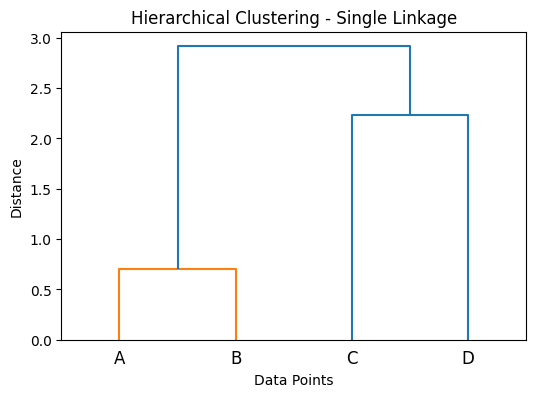

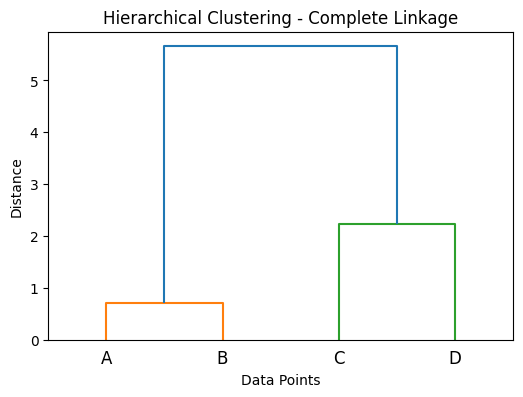

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Sample data points
X = np.array([
    [1, 1],
    [1.5, 1.5],
    [5, 5],
    [3, 4]
])

labels = ['A', 'B', 'C', 'D']

# --- Single Linkage ---
linkage_single = linkage(X, method='single')

plt.figure(figsize=(6, 4))
dendrogram(linkage_single, labels=labels)
plt.title("Hierarchical Clustering - Single Linkage")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

# --- Complete Linkage ---
linkage_complete = linkage(X, method='complete')

plt.figure(figsize=(6, 4))
dendrogram(linkage_complete, labels=labels)
plt.title("Hierarchical Clustering - Complete Linkage")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()
